# * SMS Spam Detection *

In [73]:
# Importing libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# Improving readability of the data

pd.options.display.max_columns = None
pd.options.display.max_rows = None

np.set_printoptions(suppress = True)
# Setting suppress = True ensures that numbers are shown in standard decimal format, making them easier to read.

In [75]:
df = pd.read_csv(r"C:\Amisha\MY PROJECTS\ML Projects\SMS Spam Detector\spam.csv", encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3790,spam,"Twinks, bears, scallies, skins and jocks are c...",NaN,NaN,NaN
384,spam,Double mins and txts 4 6months FREE Bluetooth ...,NaN,NaN,NaN
5402,ham,Hi babe its me thanks for coming even though i...,NaN,NaN,NaN
3442,ham,Your board is working fine. The issue of overh...,NaN,NaN,NaN
838,spam,We tried to contact you re our offer of New Vi...,NaN,NaN,NaN


## 1. Data Cleaning

In [76]:
df.shape

(5572, 5)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [78]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [79]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [80]:
# missing values

Total = df.isnull().sum().sort_values(ascending=False)
Percent = (df.isnull().sum())*100/(df.isnull().count())

missing_values = pd.concat([Total,Percent],axis=1,keys=['Total','Percent'])
missing_values

,Total,Percent
Unnamed: 4,5566,99.892319
Unnamed: 3,5560,99.784637
Unnamed: 2,5522,99.102656
v1,0,0.000000
v2,0,0.000000


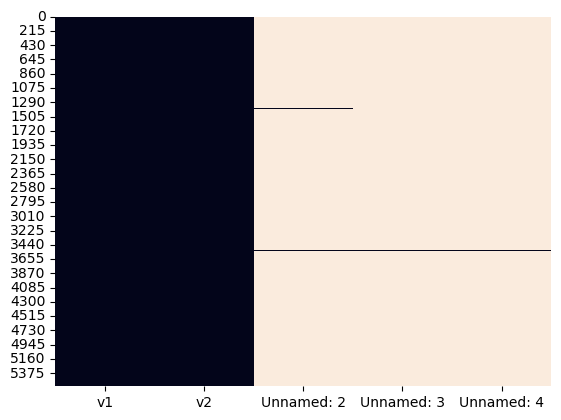

In [81]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

It can be clearly seen that the unnamed columns have negligible non-null values.

In [82]:
df.drop(columns=['Unnamed: 4','Unnamed: 3','Unnamed: 2'], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [83]:
# Renaming columns
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.sample()

,target,text
132,ham,First answer my question.


In [84]:
# Label encoding using LabelEncoder class from sklearn.preprocessing module

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()   # an instance of LAbelEncoder is created

In [85]:
# This line applies the encoder to the target column of the DataFrame df. 
# The fit_transform method both fits the encoder to the data (learning the unique categories in the target column) 
# and transforms the data into numerical labels. The original target column is replaced with the transformed numerical labels.

df['target'] = encoder.fit_transform(df['target'])

In [86]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [87]:
# duplicate values

df.duplicated().sum()

403

In [88]:
# removing duplicates

df = df.drop_duplicates(keep='first')

In [89]:
df.shape   # 403 duplicates removed

(5169, 2)

## 2. Explorartory Data Analysis (EDA)

In [90]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

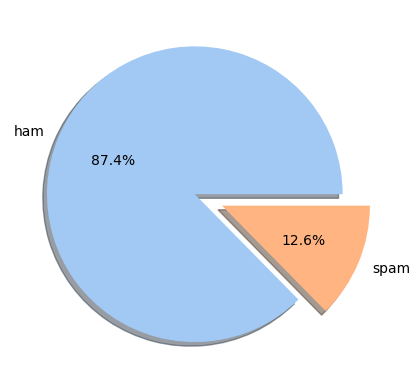

In [91]:
explode = 0,0.2
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.1f%%', 
        explode = explode, colors= sns.color_palette('pastel'), shadow= True)

plt.show()

Data is highly imbalanced.

In [92]:
import nltk  # importing the Natural Language Toolkit (NLTK) library

# It is widely used for natural language processing (NLP) tasks in Python. It provides various utilities for text processing, 
# such as tokenization, stemming, and parsing.

In [93]:
nltk.download('punkt') # downloading the punkt package

# It is a pre-trained model used for tokenizing text into sentences or words. Tokenization is the process of 
# breaking down text into smaller components like words or sentences, which is a common step in NLP tasks.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [94]:
# Adding new columns

In [95]:
# Total number of characters

df['num_characters'] = df['text'].apply(len)  

In [96]:
# Total number of words

#nltk.word_tokenize is a function from the NLTK library that breaks the input text x into a list of individual words (tokens).
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [97]:
# Total number of sentences

#nltk.sent_tokenize() breaks the input text x into a list of sentences.
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [98]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [99]:
df[['num_characters','num_words','num_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,5169.0,78.977945,58.236293,2.0,36.0,60.0,117.0,910.0
num_words,5169.0,18.453279,13.324793,1.0,9.0,15.0,26.0,220.0
num_sentences,5169.0,1.947185,1.362406,1.0,1.0,1.0,2.0,28.0


In [100]:
# ham messages

df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [101]:
# spam messages

df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


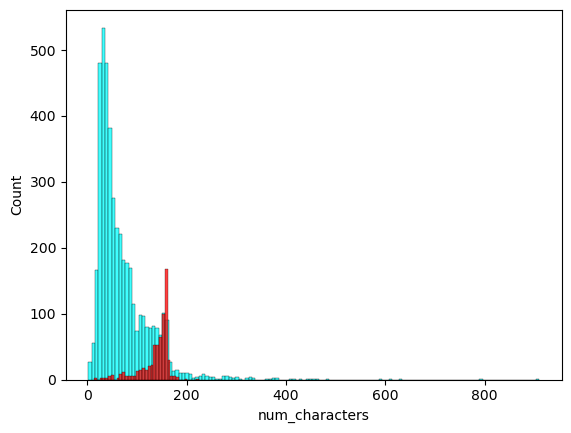

In [102]:
sns.histplot(df[df['target'] == 0]['num_characters'], color='aqua')
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

plt.show()

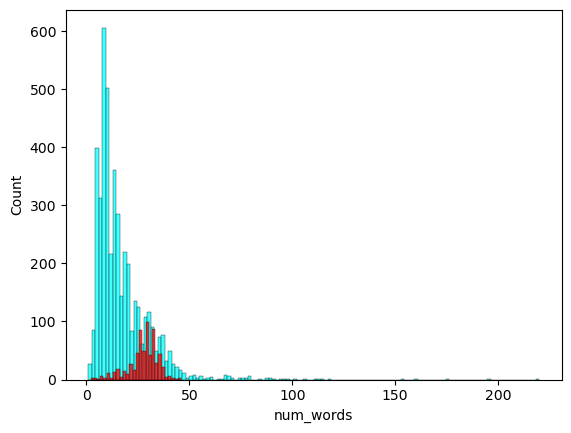

In [103]:
sns.histplot(df[df['target'] == 0]['num_words'], color='aqua')
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

plt.show()

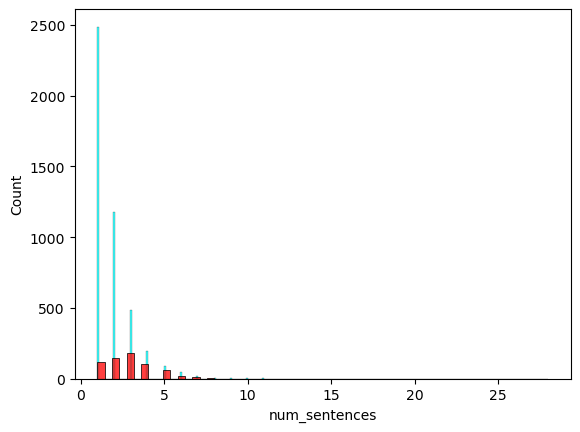

In [104]:
sns.histplot(df[df['target'] == 0]['num_sentences'], color='aqua')
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

plt.show()

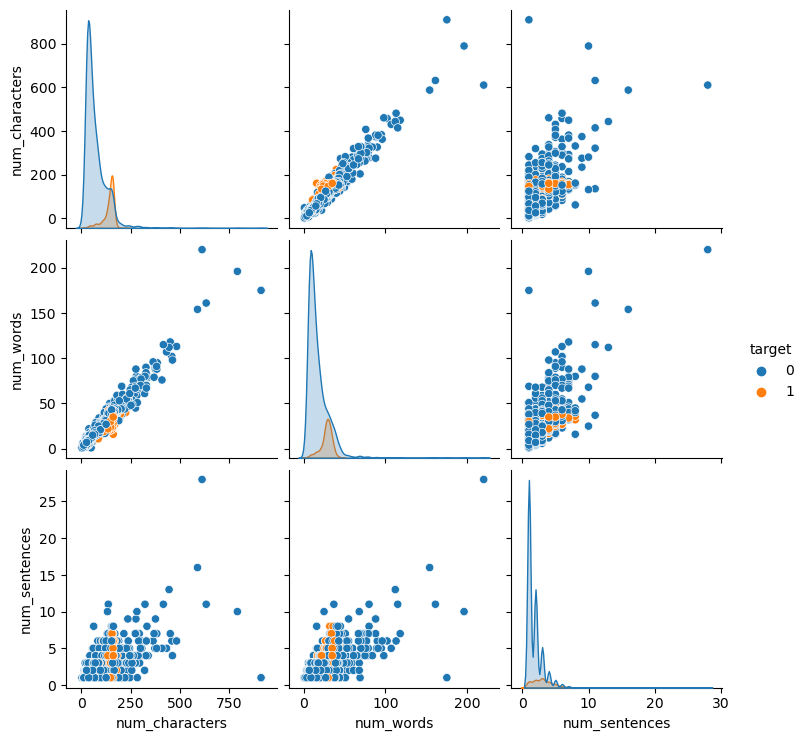

In [105]:
sns.pairplot(df, hue='target') #the points in each scatter plot will be colored according to their target value.
plt.show()

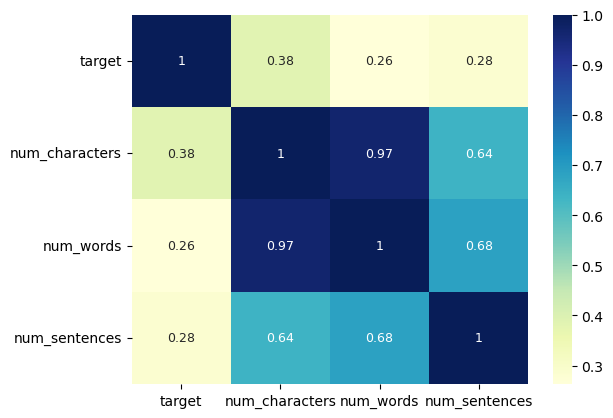

In [106]:
sns.heatmap(df.corr(), annot=True, cmap ='YlGnBu', annot_kws = {'size':9})
plt.show()

It's clear that there is multicollinearity. Therefore, num_words and num_sentences shall be removed. Collinearity can make it difficult to detect the individual effect of each predictor variable because the variables explain the same variance. It becomes hard to interpret which predictor variables are truly driving the outcome when variables are highly correlated with each other.

## 3. Text Data Preprocessing

* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [107]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [108]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [109]:
# The PorterStemmer is an algorithm for stemming words in NLP, which reduces words to their root or base form (called the stem).

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [110]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    
    y= []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)

In [111]:
df['transformed_text'] = df['text'].apply(transform_text)

In [112]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [113]:
!pip install wordcloud

In [114]:
# WordCloud class is used to generate word clouds — a visual representation of the frequency of words in a text, 
# where more frequent words appear larger.

from wordcloud import WordCloud 
wc = WordCloud(width= 1000, height= 1000, min_font_size=10, background_color ='white')

In [115]:
# All the text messages that fulfills the requirements are converted to a single large string. 
# generate method takes the concatenated string and generates a word cloud.

spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = " "))

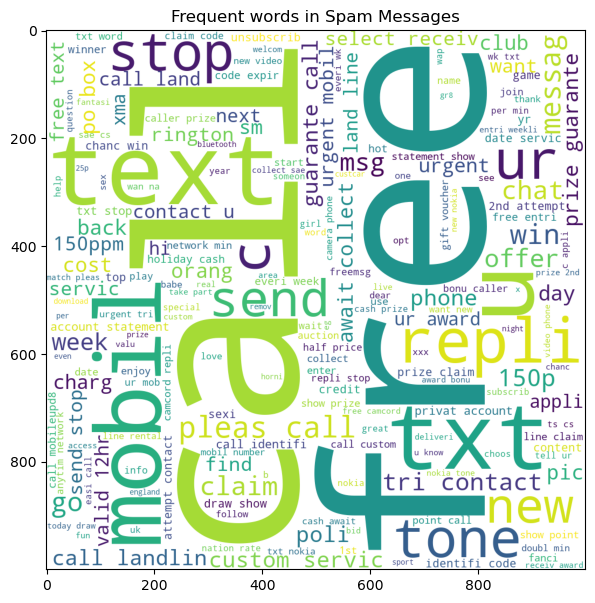

In [116]:
# This is responsible for rendering the word cloud as an image in the notebook or graphical window.

plt.figure(figsize=(10,7))
plt.imshow(spam_wc)
plt.title('Frequent words in Spam Messages')
plt.show()

In [117]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

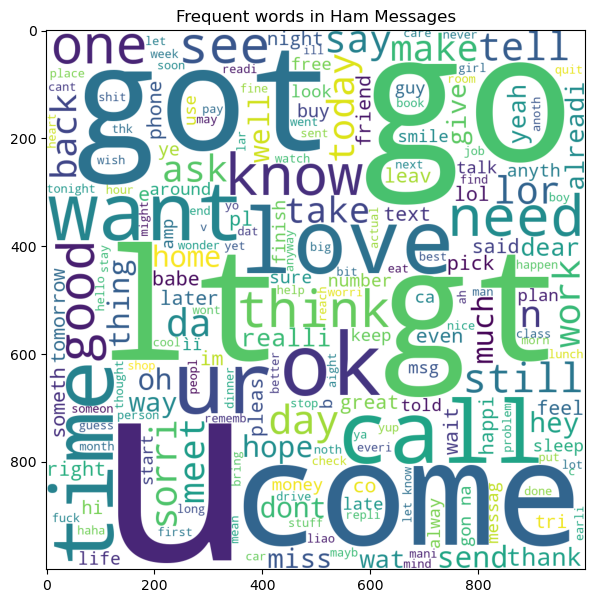

In [118]:
plt.figure(figsize=(10,7))
plt.imshow(ham_wc)
plt.title('Frequent words in Ham Messages')
plt.show()

In [119]:
spam_corpus=[]

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9939

In [120]:
from collections import Counter # counts the frequency of each element (word) in spam_corpus

In [121]:
spamc = pd.DataFrame(Counter(spam_corpus).most_common(30))

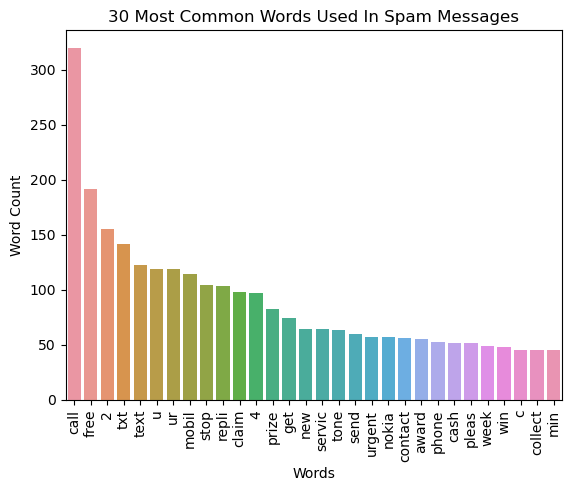

In [122]:
sns.barplot(spamc[0],spamc[1])

plt.title('30 Most Common Words Used In Spam Messages')
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Word Count')
plt.show()

In [123]:
ham_corpus = []

for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [124]:
len(ham_corpus)

35394

In [125]:
hamc = pd.DataFrame(Counter(ham_corpus).most_common(30))

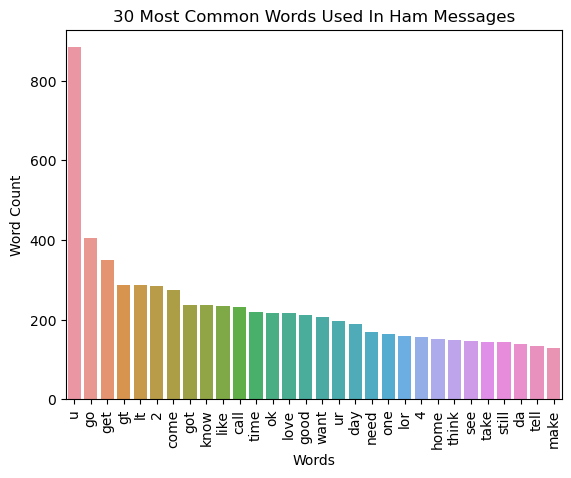

In [126]:
sns.barplot(hamc[0],hamc[1])

plt.title('30 Most Common Words Used In Ham Messages')
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Word Count')
plt.show()

No. of words in ham messages(35,394) are more than that in spam messages(9939).

## 4. Model Building


Since on textual data, naive bayes works best. Let's begin with that.
Building and evaluating three different Naive Bayes models (GaussianNB, MultinomialNB, and BernoulliNB) on a text classification problem,i.e, spam detection, based on the target and transformed_text features. 

* CountVectorizer: Converts a collection of text documents to a matrix of token counts (bag-of-words representation).


* TfidfVectorizer: Converts a collection of text documents to a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features. TF-IDF is a more sophisticated way of measuring the importance of a word in a document, compared to other documents in the dataset.

In [195]:
# CountVectorizer and TfidfVectorizer: Used to convert the transformed_text into numerical features (a document-term matrix).
# max_features=3000: This limits the number of features (words or tokens) to the top 3000 most frequent terms. 
# This is done to reduce the feature space and eliminate very rare terms.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
cv= CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) 

In [196]:
# .toarray(): Converts the sparse matrix into a dense array (a full matrix). 
# This may increase memory usage, but it makes it easier to work with certain machine learning algorithms.

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [197]:
X.shape

(5169, 3000)

In [198]:
y = df['target'].values

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=2)

###### Naive Bayes Models:

* GaussianNB: Assumes Gaussian distribution for features.
* MultinomialNB: Assumes multinomial distribution, usually works well for text data.
* BernoulliNB: Assumes binary features, often used in binary classification problems like spam detection.

###### Metrics: 
accuracy_score, confusion_matrix, and precision_score are imported to evaluate the model.

In [201]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [202]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [203]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

print('Accuracy_score: ', accuracy_score(y_test,y_pred1))
print('Confusion_matrix: \n',confusion_matrix(y_test,y_pred1))
print('Precision_score: ',precision_score(y_test,y_pred1))

Accuracy_score:  0.8694390715667312
Confusion_matrix: 
 [[788 108]
 [ 27 111]]
Precision_score:  0.5068493150684932


In [204]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

print('Accuracy_score: ', accuracy_score(y_test,y_pred2))
print('Confusion_matrix: \n',confusion_matrix(y_test,y_pred2))
print('Precision_score: ',precision_score(y_test,y_pred2))

Accuracy_score:  0.9709864603481625
Confusion_matrix: 
 [[896   0]
 [ 30 108]]
Precision_score:  1.0


In [205]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)

print('Accuracy_score: ', accuracy_score(y_test,y_pred3))
print('Confusion_matrix: \n',confusion_matrix(y_test,y_pred3))
print('Precision_score: ',precision_score(y_test,y_pred3))

Accuracy_score:  0.9835589941972921
Confusion_matrix: 
 [[895   1]
 [ 16 122]]
Precision_score:  0.991869918699187


###### Conclusion:

* GaussianNB has an accuracy of ~87.6% but a lower precision (0.52), meaning it has more false positives.
* MultinomialNB performs better with an accuracy of ~95.9% and perfect precision.
* BernoulliNB is the best-performing model with an accuracy of ~97% and a high precision score.

The results suggest that BernoulliNB or MultinomialNB works best for this text classification task, possibly because of the nature of the input features (TF-IDF-transformed text). 

Let's consider MultinomialNB since it performed extremely well as compared to others.

Multiple classifiers being compared based on their performance:

In [206]:
# Importing various classification models from scikit-learn (sklearn) and xgboost.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [207]:
# Classifiers initialized with specific hyperparameters

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2) 
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [208]:
# Storing Classifiers in a Dictionary

clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [209]:
# train_classifier function trains a given classifier clf using the training data (X_train, y_train) 
# and evaluates it on the test data (X_test, y_test) by calculating its accuracy and precision scores.

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [210]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [211]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print('For', name, ':')
    print('Accuracy score: ', current_accuracy)
    print('Precision score: ', current_precision, '\n')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC :
Accuracy score:  0.9758220502901354
Precision score:  0.9747899159663865 

For KN :
Accuracy score:  0.9052224371373307
Precision score:  1.0 

For NB :
Accuracy score:  0.9709864603481625
Precision score:  1.0 

For DT :
Accuracy score:  0.9303675048355899
Precision score:  0.8367346938775511 

For LR :
Accuracy score:  0.9584139264990329
Precision score:  0.9702970297029703 

For RF :
Accuracy score:  0.9748549323017408
Precision score:  0.9827586206896551 

For AdaBoost :
Accuracy score:  0.960348162475822
Precision score:  0.9292035398230089 

For BgC :
Accuracy score:  0.9574468085106383
Precision score:  0.8671875 

For ETC :
Accuracy score:  0.9748549323017408
Precision score:  0.9745762711864406 

For GBDT :
Accuracy score:  0.9477756286266924
Precision score:  0.92 

For xgb :
Accuracy score:  0.971953578336557
Precision score:  0.943089430894309 



In [212]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 
                               'Accuracy Score': accuracy_scores, 
                               'Precision Score': precision_scores}).sort_values('Precision Score',ascending=False)

performance_df

,Algorithm,Accuracy Score,Precision Score
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


<Figure size 1200x600 with 0 Axes>

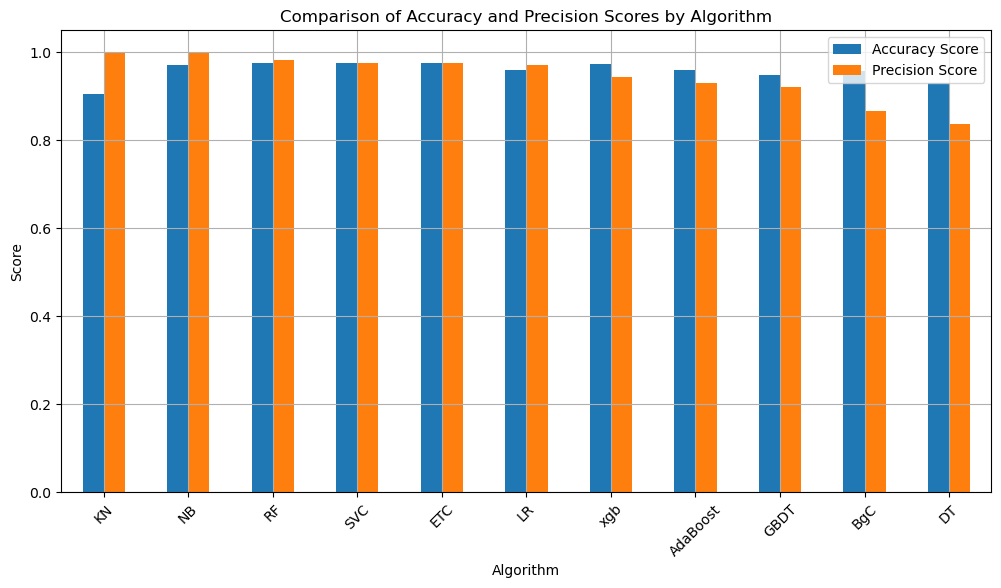

In [213]:
plt.figure(figsize=(12,6))

performance_df.set_index('Algorithm').plot(kind='bar', figsize=(12, 6))

plt.title('Comparison of Accuracy and Precision Scores by Algorithm')
plt.ylabel('Score')
plt.xlabel('Algorithm')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

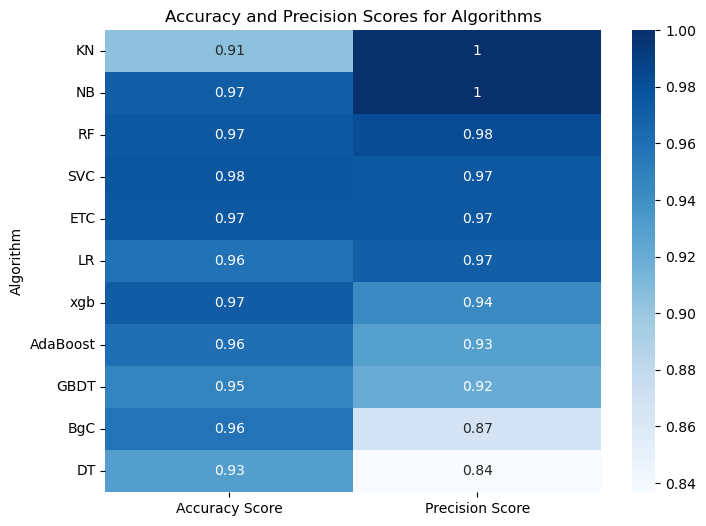

In [214]:
plt.figure(figsize=(8, 6))

sns.heatmap(performance_df.set_index('Algorithm'), annot=True, cmap='Blues')

plt.title('Accuracy and Precision Scores for Algorithms')
plt.show()

###### Insights


* K-Nearest Neighbors (KN) and Naive Bayes (NB) have perfect precision scores of 1.00, meaning they make no false-positive predictions.


* Support Vector Classifier (SVC), Random Forest (RF) and Extra Trees Classifier (ETC) show excellent overall performance, with high accuracy and high precision. 


* Bagging Classifier (BgC) and Decision Tree (DT) are comparatively weaker in terms of precision, and thus might generate more false positives in predictions.

###### Conclusion

* Out of all the algorithms, the best performing algorithm is Multinomial Naive Bayes.

In [216]:
import pickle 
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))